## Upload and Filter Circuitscape Map

This notebook will allow you to upload the circuitscape map that will be used to determine dipsersal. Values that fall outside of the current density values will be filtered to aid in visualization. 

In [1]:
# MatPlotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.colors import LinearSegmentedColormap

# Plotting Library
import toyplot

# Scientific libraries
import numpy as np

# Spatial Analyses
from osgeo import gdal

# Circuitscape Map
deer = '/Users/meredithvanacker/Documents/E3B/PDSB/ProjectData/cr_deercirc_tenm.asc'

Open the raster file

In [2]:
dataset = gdal.Open(deer)
if dataset is None:
    print('Could not open image' )
    sys.exit(1)
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x1166c5750> >

Define rows and columns from raster.

In [3]:
cols = dataset.RasterXSize
rows = dataset.RasterYSize
bands = dataset.RasterCount
driver = dataset.GetDriver().LongName

In [4]:
cols 

1734

In [5]:
rows

1702

In [6]:
bands

1

In [7]:
driver

'Arc/Info ASCII Grid'

Check the data type of raster.

In [8]:
band = dataset.GetRasterBand(1)
bandtype = gdal.GetDataTypeName(band.DataType)
bandtype

'Float32'

Get initial visual of the data.

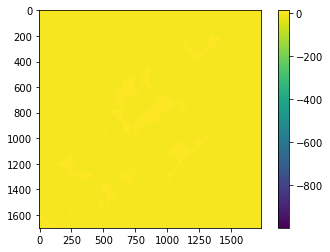

In [9]:
pixel_values = dataset.ReadAsArray()
plt.imshow(pixel_values)
plt.colorbar()

### Find and filter No Data values.

In [10]:
# No data values 
pixel_values.min()

-999.0

In [11]:
pixel_values.max()

12.648996

In [12]:
# Get rid of negative values by taking the absolute value
p = np.absolute(pixel_values)
p

array([[999., 999.,   0., ...,   0.,   0.,   0.],
       [999., 999.,   0., ...,   0.,   0.,   0.],
       [999., 999.,   0., ...,   0.,   0.,   0.],
       ...,
       [999., 999.,   0., ...,   0.,   0.,   0.],
       [999., 999.,   0., ...,   0.,   0.,   0.],
       [999., 999.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [13]:
p.shape

(1702, 1734)

In [14]:
# Create Mask
# want new values where beyond range is set to 0

mask = np.logical_and(p >= 0, p <= 0.25, dtype = bool)
pnew = p[mask]
pnew # this removes the numbers that do not fit the conditonal

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [15]:
p[np.invert(mask)] = 0

In [16]:
p

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

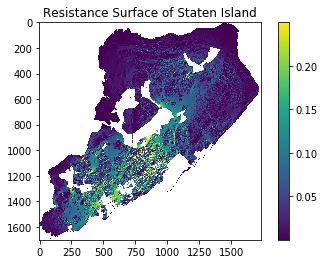

In [17]:
# Try to blank out the 0 in background

masked_array = np.ma.masked_inside(p, 0.00, 0.00000000000001)
plt.imshow(masked_array)
plt.title('Resistance Surface of Staten Island')
plt.colorbar()
plt.show()



